In [30]:
import csv
import numpy as np

import plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.io as pio
from matplotlib import pyplot as plt

def format_tool_id(tool_link):
        tool_id_split = tool_link.split( "/" )
        tool_id = tool_id_split[ -2 ] if len( tool_id_split ) > 1 else tool_link
        return tool_id

tool_usage_file = "data/tool_usage/tool-popularity.tsv"
tool_usage_dict = dict()
with open( tool_usage_file, 'rt' ) as usage_file:
    tool_usage = csv.reader(usage_file, delimiter='\t')
    for index, row in enumerate(tool_usage):
        tool_id = format_tool_id(row[0])
        if tool_id not in tool_usage_dict:
            tool_usage_dict[tool_id] = dict()
            tool_usage_dict[tool_id][row[1]] = int(row[2])
        else:
            curr_date = row[1]
            if curr_date in tool_usage_dict[tool_id]:
                tool_usage_dict[tool_id][curr_date] += int(row[2])
            else:
                tool_usage_dict[tool_id][curr_date] = int(row[2])

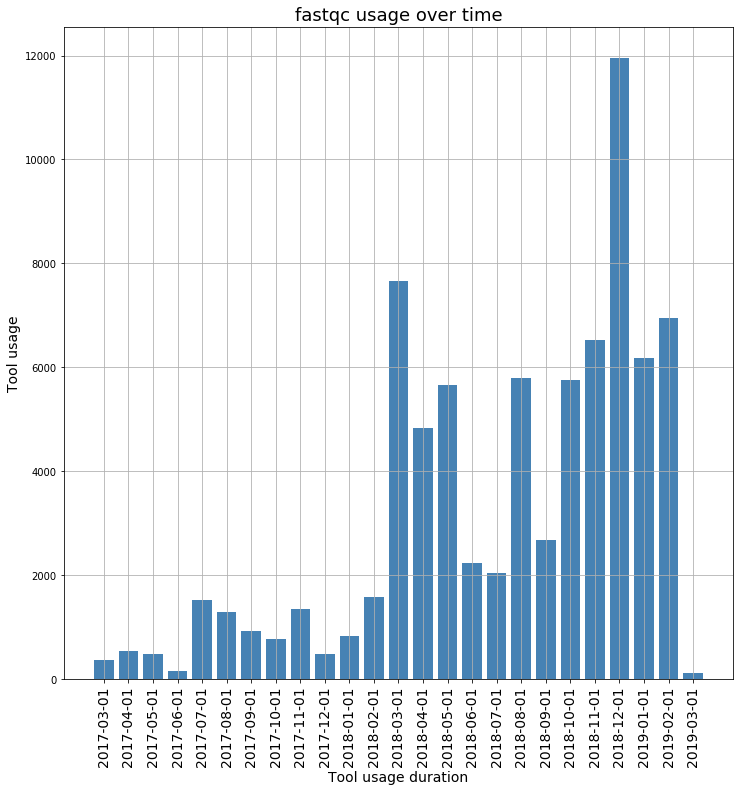

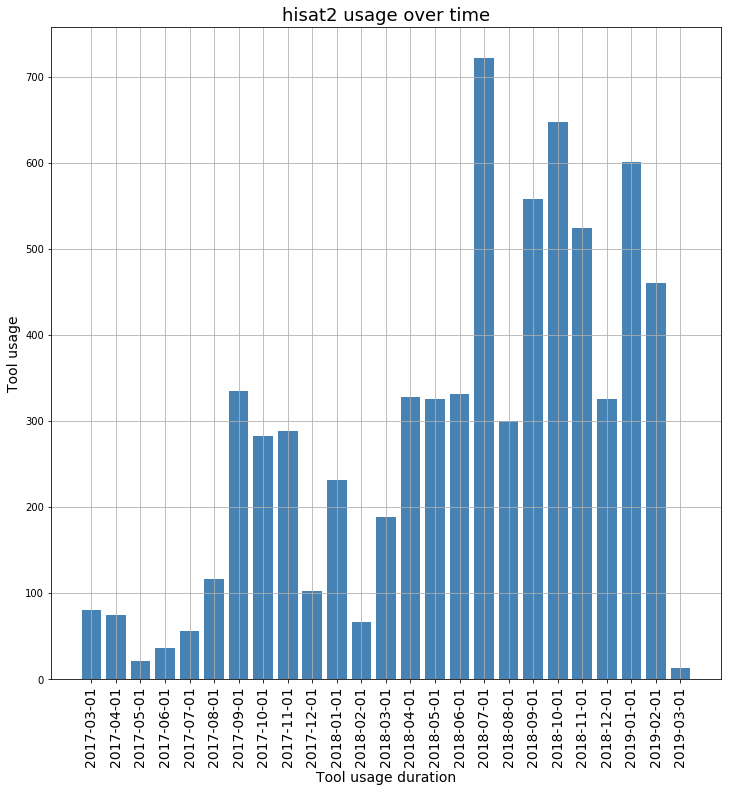

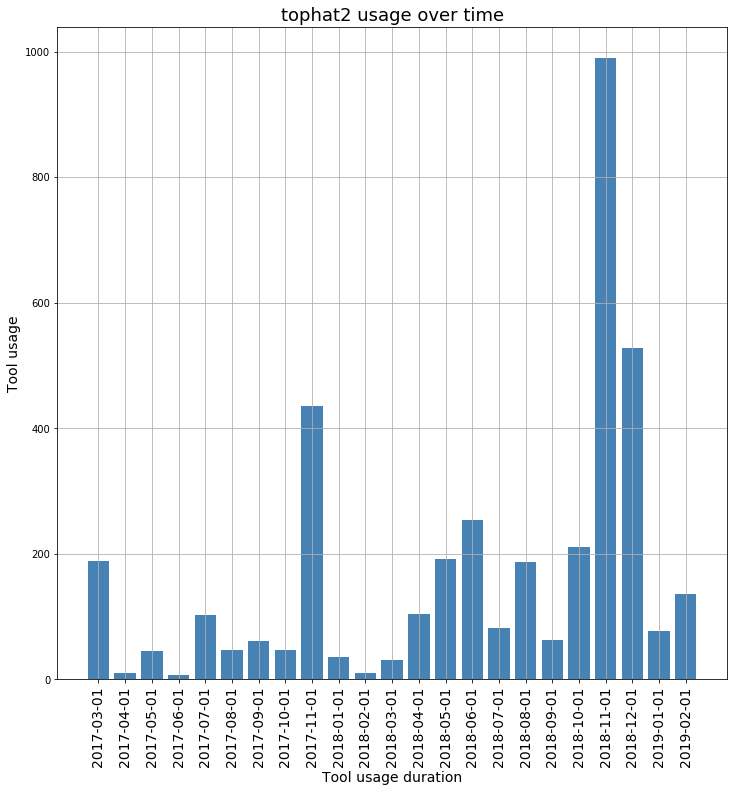

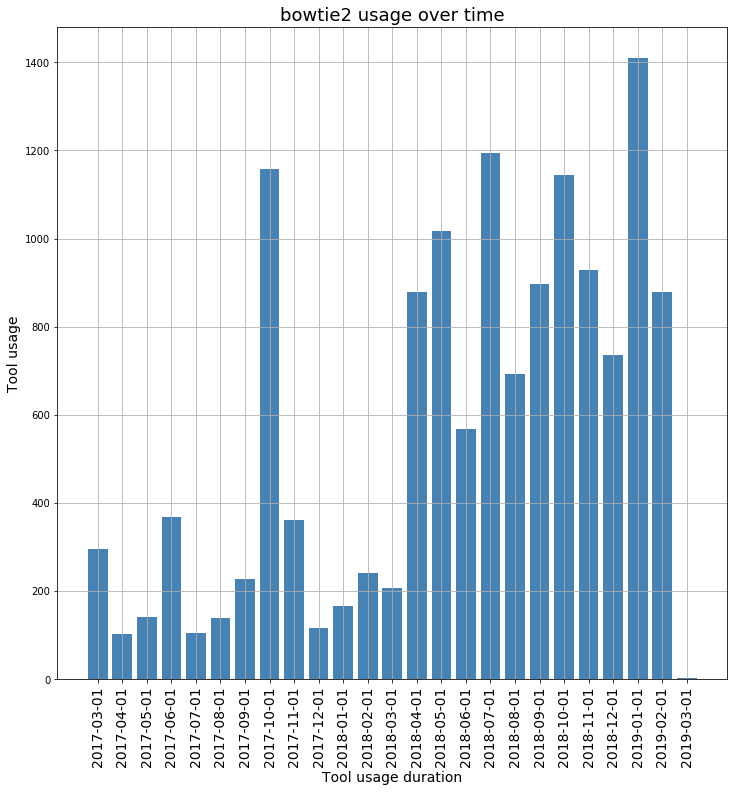

In [35]:
def plot_hist(tool_name):
    size_title = 18
    size_label = 14
    y_val = []
    x_val = []
    tool_data = tool_usage_dict[tool_name]
    for x, y in tool_data.items():
        x_val.append(x)
        y_val.append(y)
    
    x_val = list(reversed(x_val))
    y_val = list(reversed(y_val))

    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val))
    plt.bar(x_pos, y_val, color='steelblue')
    plt.xlabel('Tool usage duration', size=size_label)
    plt.ylabel('Tool usage', size=size_label)
    plt.xticks(range(len(x_val)), x_val, size=size_label, rotation='vertical')
    plt.title(('%s usage over time' % tool_name), size=size_title)
    plt.grid(True)
    plt.show()

# plot tool usage over time
plot_hist('fastqc')
plot_hist('hisat2')
plot_hist('tophat2')
plot_hist('bowtie2')